In [1]:
from IPython.display import Image

# Aprendizaje supervisado

- Los valores a predecir ya están.
- Utiliza funciones para predecir el valor de una variable objeto.

Existe dos tipos de aprendizaje supervisado:

1. Clasificación.- Predice la etiqueta o categoría de una observación binaria. Por ejemplo podemos predecir si una transacción bancaria es fraudulenta o no (Clasificación binaria).
2. Regresión.- Se utiliza para predecir valores continuos. Por jemplo, predice el precio de propiedad dado la característica (variable predictiva o variable independiente) el número de dormitorios y el tamaño de una propiedad. Lo que llamamos variable objeto hace referencia a variable dependiente o variable respuesta.

CONDICIONES:

1. Los datos no deben tener valores faltantes.
2. Deben ser numéricos.
3. Se almacenan como DataFrames, series o matrices NumPy.

A PRIORI SE NECESITA UN ANÁLISIS EXPLORATORIO DE DATOS PARA GARANTIZAR QUE LOS DATOS ESTÉN EN EL FORMATO CORRECTO.

scikit-learn sigue la misma sintaxis para todo los modelos de aprendizaje supervisado, lo que hace que el flujo de trabajo sea repetible.

## Clasificación
### Desafiío de la Clasificación
El aprendizaje supervisado utiliza etiquetas. Analicemos cómo podemos construir un modelo de clasificación, o clasificador, para predecir las etiquetas de datos.

Hay cuatro pasos. 
1. Construimos un clasificador,
2. que aprende de los datos etiquetados que le pasamos.
3. Luego le pasamos datos sin etiquetar como entrada y
4.  hacemos que prediga etiquetas para estos datos invisibles.

### k-vecinos más cercanos
Usaremos un algoritmo llamado k-Vecinos más cercanos, que es popular para problemas de clasificación. La idea de k-Vecinos más cercanos, o `KNN`, es predecir la etiqueta de cualquier punto de datos mirando los `k`, por ejemplo, tres puntos de datos etiquetados más cercanos y hacer que voten sobre qué etiqueta debería tener la observación sin etiqueta. `KNN` utiliza la votación por mayoría, que hace predicciones basadas en la etiqueta que tiene la mayoría de los vecinos más cercanos.

Si `k` es igual a tres, lo clasificaríamos como rojo. Esto se debe a que dos de las tres observaciones más cercanas están en rojo. Si `k` es igual a cinco, lo clasificaríamos como azul.

Para generar intuición sobre KNN, veamos este diagrama de dispersión que muestra el cargo total por la noche versus el cargo total por el día para los clientes de una empresa de telecomunicaciones. Las observaciones están coloreadas en azul para los clientes que han abandonado y en rojo para aquellos que no han abandonado.

Aquí hemos visualizado los resultados de un algoritmo KNN donde el número de vecinos se establece en 15. KNN crea un límite de decisión para predecir si los clientes abandonarán. Se predice que cualquier cliente en el área con un fondo gris abandonará, y se predice que aquellos en el área con un fondo rojo no abandonarán. Este límite se utilizaría para hacer predicciones sobre datos invisibles.

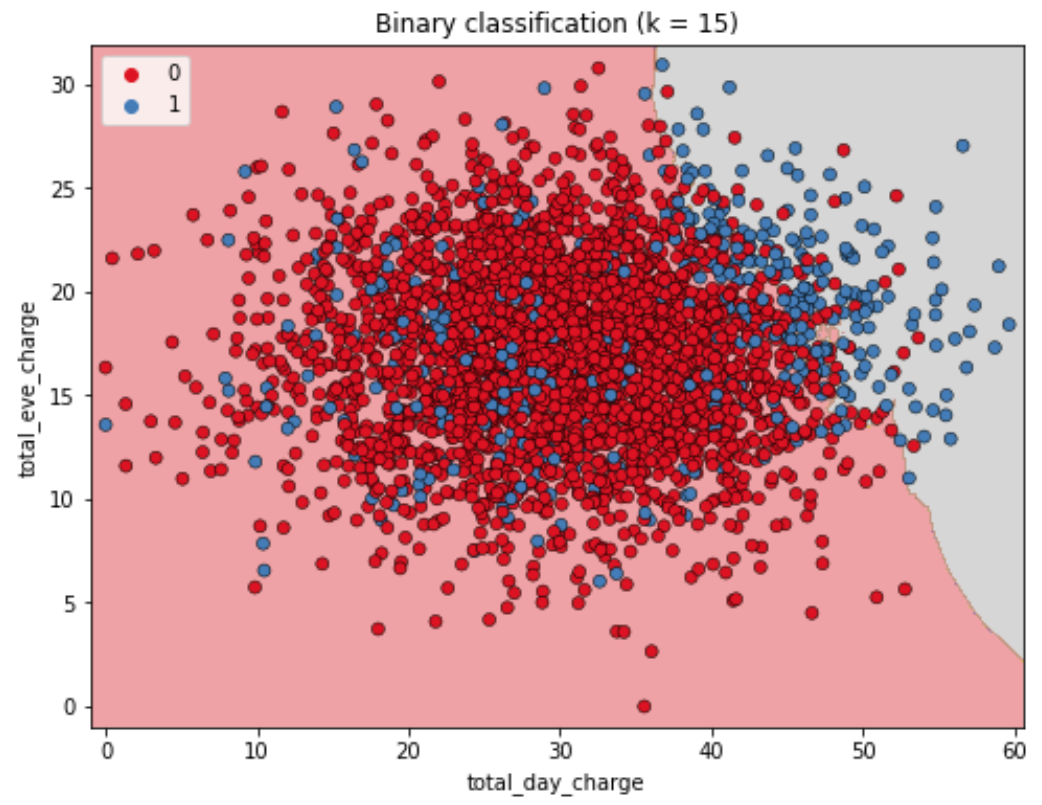

In [3]:
Image(filename="/home/jovyan/notebooks/image/01_KNN.png")

Para ajustar un modelo KNN usando scikit-learn, importamos `KNeighborsClassifier` de `sklearn.neighbors`. Dividimos nuestros datos en X, una matriz 2D de nuestras características, e y, una matriz 1D de los valores objetivo (en este caso, el estado de abandono). `scikit-learn` requiere que las características estén en una matriz donde cada columna sea una característica y cada fila una observación diferente. De manera similar, el bjetivo o variables a explicar debe ser una sola columna con la misma cantidad de observaciones que los datos de la característica. Usamos el atributo de valores de puntos para convertir $X$ e $y$ en matrices `NumPy`. Al imprimir la forma de $X$ e $y$, vemos que hay 3333 observaciones de dos características y 3333 observaciones de la variable objetivo. Luego creamos una instancia de nuestro `KNeighborsClassifier`, estableciendo `n_neighbors` igual a 15 y lo asignamos a la variable knn. Luego podemos ajustar este clasificador a nuestros datos etiquetados aplicando el método de ajuste de puntos del clasificador y pasando dos argumentos: los valores de las características, $X$, y los valores objetivo, $y$.

In [12]:
# Importar libraria scikit-learn
#from sklearn.module import Model

# Creamos una instancia del modelo
#model = Model()

# Ajustamos el modelo X, a una matriz de nuestras características y a "y" una matriz de nuestros valores de variable objetivo
#model.fit(X,y)

# Utilizamos el método de predicción de puntos del modelo y pasamos otras nuevas observaciones.
#predictions = model.predict(X_new)

Aquí tenemos un conjunto de nuevas observaciones, `X_new`. Al verificar la forma de `X_new`, vemos que tiene tres filas y dos columnas, es decir, tres observaciones y dos características. Usamos el método de predicción de puntos del clasificador y le pasamos los datos invisibles como una matriz NumPy 2D que contiene características en columnas y observaciones en filas. La impresión de las predicciones devuelve un valor binario para cada observación o fila en `X_new`. Predice 1, que corresponde a "abandono", para la primera observación, y 0, que corresponde a "no abandono", para la segunda y tercera observaciones.

### Ejercicio:
#### k-Nearest Neighbors: (ajuste) Fit
En este ejercicio, creará su primer modelo de clasificación utilizando el conjunto `churn_df`, que se ha precargado para el resto del capítulo.

El objetivo, `churn`, debe ser una sola columna con la misma cantidad de observaciones que los datos de características. Los datos de características serán convertidos en matrices numpy.

In [1]:
# Libreria
import pandas as pd

# Importa data churn_df
ruta_archivo = '/home/jovyan/notebooks/data/telecom_churn_clean.csv'
churn_df = pd.read_csv(ruta_archivo,index_col = 0)

In [5]:
# Importar KNeighborsClassifier de sklearn.neighbors.
from sklearn.neighbors import KNeighborsClassifier

# División de datos 
y = churn_df["churn"].values
X = churn_df[["account_length","customer_service_calls"]].values

# Crear una instancia de una llamada knn KNeighborsClassifier con 6 vecinos.
knn = KNeighborsClassifier(n_neighbors = 6)

# Ajustar el clasificador a los datos utilizando el método .fit().
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

#### k-Nearest Neighbors: Predicción (Predict)
Ahora que ha instalado un clasificador `KNN`, puede usarlo para predecir la etiqueta de nuevos puntos de datos. Todos los datos disponibles se utilizaron para el entrenamiento; sin embargo, afortunadamente, hay nuevas observaciones disponibles. Estos se cargarán como `X_new`.

Utilizará su clasificador para predecir las etiquetas de un conjunto de nuevos puntos de datos:

In [8]:
# Libreria
import numpy as np

# nuevas observaciones X_new 
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Crear y_pred prediciendo los valores objetivo de las características invisibles X_new.
y_pred = knn.predict(X_new)

# Imprimir las etiquetas previstas para el conjunto de predicciones.
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


### Medición del rendimieto del modelo
Ahora podemos hacer predicciones usando un clasificador, pero 

**¿cómo sabemos si el modelo está haciendo predicciones correctas?**

***En la clasificación, la precisión (accuracy) es una métrica de uso común. La precisión es el número de predicciones correctas dividido por el número total de observaciones***.
$$Precisión = \dfrac{Predicciones \; correctas}{Total \; observaciones}$$

#### ¿Cómo medimos la precisión? 

Podríamos calcular la precisión de los datos utilizados para ajustarse al clasificador. Sin embargo, como estos datos se utilizaron para entrenar el modelo, el rendimiento no será indicativo de qué tan bien se puede generalizar a datos invisibles.

Es común: 
1. dividir los datos en un conjunto de entrenamiento y un conjunto de prueba.
2. Ajustar el clasificador utilizando el conjunto de entrenamiento.
3. Calcular la precisión del modelo frente a las etiquetas del conjunto de prueba.

Para ello, importamos `train_test_split` de `sklearn.model_selection`. Llamamos `train_test_split` y pasamos nuestras características y objetivos. Normalmente, utilizamos entre el $20$ y el $30\%$ de nuestros datos como conjunto de prueba. Al establecer el argumento `test_size` en $0.3$, utilizamos aquí el $30\%$. El argumento `random_state` establece una semilla para un generador de números aleatorios que divide los datos. Si utilizamos el mismo número al repetir este paso, podremos reproducir la división exacta y nuestros resultados posteriores.

Es una buena práctica garantizar que nuestra división refleje la proporción de etiquetas en nuestros datos. Por lo tanto, si se produce abandono en el $10\%$ de las observaciones, queremos que el $10\%$ de las etiquetas en nuestros conjuntos de entrenamiento y prueba representen el abandono. Logramos esto estableciendo `stratify` igual a `y`. 

`train_test_split` devuelve cuatro matrices: 
- Los datos de entrenamiento,
- los datos de prueba,
- las etiquetas de entrenamiento y
- las etiquetas de prueba.

Las descomprimimos en `X_train`, `X_test`, `y_train` e `y_test`, respectivamente. 

Luego, creamos una instancia de un modelo KNN y lo ajustamos a los datos de entrenamiento utilizando el método de ajuste de puntos. Para verificar la precisión, utilizamos el método de puntuación de puntos, pasando la prueba $X$ y la prueba $Y$. La precisión de nuestro modelo es del $85\%$, lo cual es bajo considerando que nuestras etiquetas tienen una proporción de $9$ a $1$.

In [9]:
# Importar sklearn
from sklearn.model_selection import train_test_split

# Dividir los datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                    random_state = 21, stratify = y)

# Instanciar KNN
knn = KNeighborsClassifier(n_neighbors = 6)

# Ajustar a nuestros datos de entrenamiento
knn.fit(X_train, y_train)

# Imprimir la precisión del modelo
print(knn.score(X_test,y_test))

0.854


Analicemos cómo interpretar k. Recordemos que analizamos los límites de decisión, que son umbrales para determinar qué etiqueta asigna un modelo a una observación. En la imagen que se muestra, a medida que aumenta k, el límite de decisión se ve menos afectado por las observaciones individuales, lo que refleja un modelo más simple. Los modelos más simples son menos capaces de detectar relaciones en el conjunto de datos, lo que se conoce como ***subajuste***. Por el contrario, los modelos complejos pueden ser sensibles al ruido en los datos de entrenamiento, en lugar de reflejar tendencias generales. Esto se conoce como ***sobreajuste***.

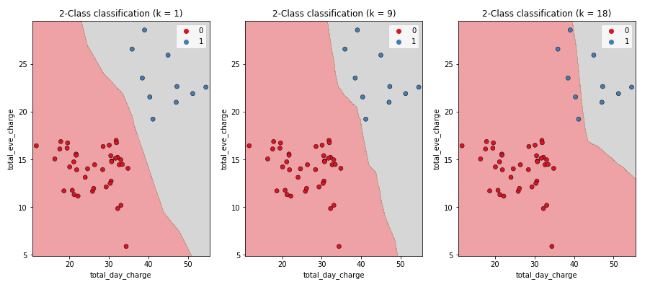

In [12]:
Image(filename="/home/jovyan/notebooks/image/01_k.png")

También podemos interpretar `k` usando una curva de complejidad del modelo. Con un modelo `KNN`, podemos calcular la precisión de los conjuntos de entrenamiento y prueba utilizando valores `k` incrementales y trazar los resultados. Creamos diccionarios vacíos para almacenar las precisiones de nuestro entrenamiento y prueba, y una matriz que contiene un rango de valores `k`. Usamos un bucle for para repetir nuestro flujo de trabajo anterior, construyendo varios modelos usando un número diferente de vecinos. Recorremos nuestra matriz de vecinos y, dentro del bucle, creamos una instancia de un modelo `KNN` con `n_neighbors` igual al iterador vecino y lo ajustamos a los datos de entrenamiento. Luego calculamos la precisión del conjunto de entrenamiento y prueba `y` almacenamos los resultados en sus respectivos diccionarios.

Después de nuestro bucle for, graficamos los valores de entrenamiento y prueba, incluida una leyenda y etiquetas.

A medida que `k` aumenta más allá de $15$, vemos un subajuste en el que el rendimiento se estanca tanto en los conjuntos de prueba como de entrenamiento, como se indica en el gráfico.

La precisión máxima de la prueba se produce en realidad en alrededor de $13$ vecinos.

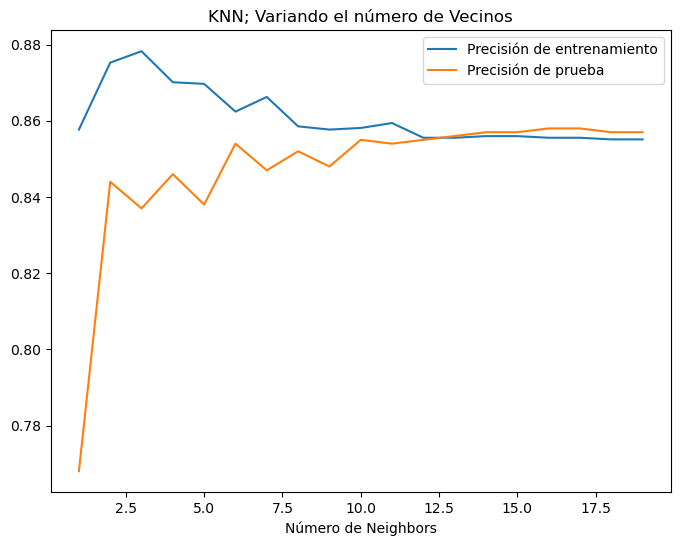

In [15]:
# Libreria
import matplotlib.pyplot as plt

# Crear diccionarios vacíos para almacenar las precisiones de nuestro
# entrenamiento y prueba, y una matriz que contiene un rango de valores "k".
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 20)

# Usar un bucle for para repetir nuestro flujo de trabajo anterior, construyendo 
# varios modelos usando un número diferente de vecinos.
for neighbor in neighbors:
    knn =  KNeighborsClassifier(n_neighbors = neighbor)
    # Entrenar el modelo
    knn.fit(X_train, y_train)
    # Calcular la precisión del conjunto de entrenamiento y prueba.
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Graficar
plt.figure(figsize = (8,6))
plt.title('KNN; Variando el número de Vecinos')
plt.plot(neighbors, train_accuracies.values(), label = "Precisión de entrenamiento")
plt.plot(neighbors, test_accuracies.values(), label = "Precisión de prueba")
plt.legend()
plt.xlabel("Número de Neighbors")
plt.show()

### Ejercicio:
#### División de entrenamiento/prueba + precisión informática
Practiquemos la división de tus datos en conjuntos de entrenamiento y prueba con el conjunto de datos churn_df.

Se  matrices NumPy para usted que contienen las características como $X$ y la variable de destino como $y$.

In [25]:
# Importar train_test_split de sklearn.model_selection.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Dividir X e y en conjuntos de entrenamiento y prueba, estableciendo un test_sizevalor igual al 20 % y asegurándose random_statede 42que las proporciones de las etiquetas de destino reflejen las del conjunto de datos original.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state = 42, stratify = y)
# Instanciar el modelo
knn = KNeighborsClassifier(n_neighbors = 5)

# Ajustar el modelo knn a los datos de entrenamiento.
knn.fit(X_train, y_train)

# Calcular e imprimir la precisión del modelo para los datos de prueba.
print(knn.score(X_test,y_test))

0.8740629685157422


#### Sobreajuste y subajuste
Interpretar la complejidad del modelo es una excelente manera de evaluar el rendimiento del aprendizaje supervisado. Su objetivo es producir un modelo que pueda interpretar la relación entre las características y la variable objetivo, así como generalizar bien cuando se exponga a nuevas observaciones.

Los conjuntos de entrenamiento y prueba se crearon a partir del conjunto de datos churn_df y se cargarán como `X_train`, `X_test`, `y_train`, y `y_test`.

Además, se importó `KNeighborsClassifier` y se importará `numpy`.

In [26]:
# libreria
import numpy as np

# Crear `neighbors` como una matriz numpy de valores desde 1 hasta inclusive 12.
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Instanciar un clasificador KNN, con el número de vecinos igual al neighboriterador.
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    # Ajustar el modelo a los datos de entrenamiento.
    knn.fit(X_train, y_train)
    # Calcule los puntajes de precisión para el conjunto de entrenamiento y el conjunto de prueba por separado utilizando el .score()método y asigne los resultados al índice de los diccionarios train_accuraciesy test_accuracies, respectivamente.
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


#### Visualizando la complejidad del modelo
Ahora que ha calculado la precisión del modelo `KNN` en los conjuntos de entrenamiento y prueba utilizando varios valores de `n_neighbors`, puede crear una curva de complejidad del modelo para visualizar cómo cambia el rendimiento a medida que el modelo se vuelve menos complejo.

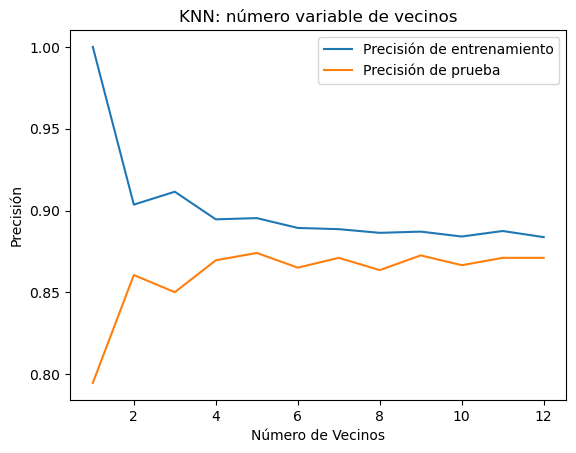

In [30]:
# Agregar un título
plt.title("KNN: número variable de vecinos")

# Graficar las precisiones de entrenamiento
plt.plot(neighbors, train_accuracies.values(), label="Precisión de entrenamiento")

# Graficar las precisiones de prueba
plt.plot(neighbors, test_accuracies.values(), label="Precisión de prueba")

plt.legend()
plt.xlabel("Número de Vecinos")
plt.ylabel("Precisión")

# Mostrar el gráfico
plt.show()

## Introducción a la regresión
Ahora vamos a analizar el otro tipo de aprendizaje supervisado: la regresión. En las tareas de regresión, la variable objetivo suele tener **valores continuos**, como el PIB de un país o el precio de una casa.

Para conceptualizar los problemas de regresión, utilicemos un conjunto de datos que contiene datos de salud de mujeres para predecir los niveles de glucosa en sangre. Cargamos el conjunto de datos como un DataFrame de pandas e imprimimos las primeras cinco filas. Contiene características que incluyen:
- el número de embarazos,
- las mediciones del pliegue cutáneo del tríceps,
- los niveles de insulina,
- el índice de masa corporal (IMC),
- la edad en años y
- el estado de diabetes, donde uno indica un diagnóstico y cero representa la ausencia de un diagnóstico.

In [3]:
# Libreria
import pandas as pd

# DATA
diabetes_df = pd.read_csv("data/diabetes_clean.csv")

# Imprimir las primeras 5 filas
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


Recuerde que `scikit-learn` requiere características y valores objetivo en variables distintas, $X$ e $y$. Para utilizar todas las funciones de nuestro conjunto de datos, eliminamos nuestro objetivo, los niveles de glucosa en sangre, y almacenamos el atributo de valores como $X$. Para $y$, tomamos el atributo de valores de la columna objetivo. Podemos imprimir el tipo de $X$ e $y$ para confirmar que ahora ambos son matrices NumPy.

In [4]:
# Dividir en variables explicativas y objetivo
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Para empezar, intentemos predecir los niveles de glucosa en sangre a partir de una única característica: el índice de masa corporal. Para hacer esto, cortamos la columna `IMC` de `X`, que es la cuarta columna, y la almacenamos como la variable `X_bmi`. Al verificar la forma de `y` y `X_bmi`, vemos que ambos son conjuntos unidimensionales. Esto está bien para `y`, pero nuestras funciones deben formatearse como una matriz bidimensional para que `scikit-learn` las acepte. Para convertir la forma de `X_bmi` aplicamos el método de remodelación de puntos de NumPy, pasando menos uno seguido de uno. Imprimir la forma nuevamente muestra que `X_bmi` ahora es la forma correcta para nuestro modelo.

In [6]:
# Sólo escogemos el indice de masa corporal
X_bmi = X[:,3]

# Imprimir shape
print(y.shape, X_bmi.shape)

# Convertir X_bmi
X_bmi = X_bmi.reshape(-1,1)

# Imprimir
print(X_bmi.shape)

(768,) (768,)
(768, 1)


Ahora, graficaremos los niveles de glucosa en sangre como función del índice de masa corporal. Importamos `matplotlib.pyplot` como `plt`, luego pasamos `X_bmi` e ``y a `plt.scatter`. También etiquetaremos nuestros ejes usando los métodos `xlabel` e `ylabel`.

Podemos ver que, generalmente, a medida que aumenta el índice de masa corporal, los niveles de glucosa en sangre también tienden a aumentar.

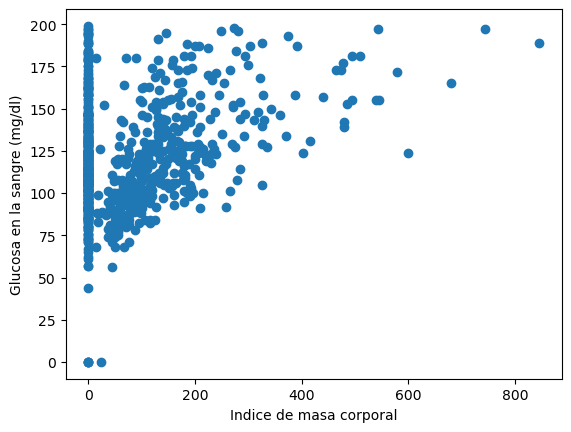

In [8]:
# Libreria
import matplotlib.pyplot as plt

# Graficar
plt.scatter(X_bmi, y)
plt.ylabel("Glucosa en la sangre (mg/dl)")
plt.xlabel("Indice de masa corporal")
plt.show()

Es hora de ajustar un modelo de regresión a nuestros datos. Vamos a utilizar un modelo llamado regresión lineal, que ajusta una línea recta a nuestros datos. Explicaremos la mecánica de la regresión lineal en el próximo video, pero primero, veamos cómo ajustarla y trazar predicciones. Importamos `LinearRegression` de `sklearn.linear_model` y creamos una instancia de nuestro modelo de regresión. Como estamos modelando la relación entre la característica, el índice de masa corporal y el objetivo, los niveles de glucosa en sangre, en lugar de predecir valores objetivo para nuevas observaciones, ajustamos el modelo a todas nuestras observaciones de características. Hacemos esto llamando a `reg.fit` y pasando los datos de la característica y la variable objetivo, lo mismo que hicimos para los problemas de clasificación. Después de esto, podemos crear la variable de predicciones llamando a `reg.predict` y pasando nuestras características. Como estamos prediciendo los valores objetivo de las características utilizadas para entrenar el modelo, esto nos da una línea de mejor ajuste para nuestros datos. Producimos nuevamente nuestro gráfico de dispersión y luego llamamos a `plt.plot` para producir un gráfico de líneas, pasando nuestras características, `X_bmi`, seguidas de nuestras predicciones.

La línea negra representa el ajuste del modelo de regresión lineal de los valores de glucosa en sangre frente al índice de masa corporal, que parece tener una correlación positiva de débil a moderada.

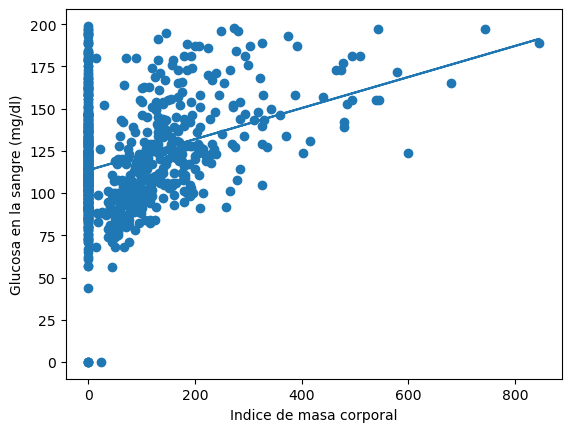

In [9]:
# Libreria
from sklearn.linear_model import LinearRegression

# Intanciar modelo
reg = LinearRegression()

# Ajustar a los datos
reg.fit(X_bmi, y)

# Predecir
predictions = reg.predict(X_bmi)

# Graficar
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Glucosa en la sangre (mg/dl)")
plt.xlabel("Indice de masa corporal")
plt.show()

### Ejercicio
#### Creando características
Trabajaremos con un conjunto de datos llamado `sales_df`, que contiene información sobre el gasto en campañas publicitarias en diferentes tipos de medios y la cantidad de dólares generados en ventas para la campaña respectiva.

Utilizaremos los gastos de publicidad como características para predecir los valores de ventas, trabajando inicialmente con la columna `radio`. Sin embargo, antes de realizar predicciones, deberá crear las matrices de características y objetivos, y modificarlas para que tengan el formato correcto para `scikit-learn`.

In [12]:
# Libreria
import numpy as np
import pandas as pd

# data
sales_df = pd.read_csv("data/advertising_and_sales_clean.csv")

# Crear una matrz X de los valores  del DataFrame sales_df de la columna  "radio".
X = sales_df["radio"].values.reshape(-1,1)

# Crear una matrz X de los valores  del DataFrame sales_df de la columna "sales".
y = sales_df["sales"].values

# Imprimir la forma de X e y.
print(X.shape, y.shape)

(4546, 1) (4546,)


#### Construcción de un modelo de regresión lineal
Ahora que ha creado sus matrices de características y objetivos, entrenará un modelo de regresión lineal en todos los valores de características y objetivos.

Como el objetivo es evaluar la relación entre la característica y los valores objetivo, no es necesario dividir los datos en conjuntos de entrenamiento y prueba.

In [14]:
# Importar LinearRegression.
from sklearn.linear_model import LinearRegression

# Instanciar un modelo de regresión lineal.
reg = LinearRegression()

# Ajustar a los datos
reg.fit(X,y)

# Predecir los valores de ventas usando X, almacenándolos como predictions.
predictions = reg.predict(X)

# print(predictions[:5])
print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


#### Visualización de un modelo de regresión lineal
Ahora que ha creado su modelo de regresión lineal y lo ha entrenado utilizando todas las observaciones disponibles, puede visualizar qué tan bien se ajusta el modelo a los datos. Esto permite interpretar la relación entre el gasto publicitario de `radio` y los valores de `sales`.

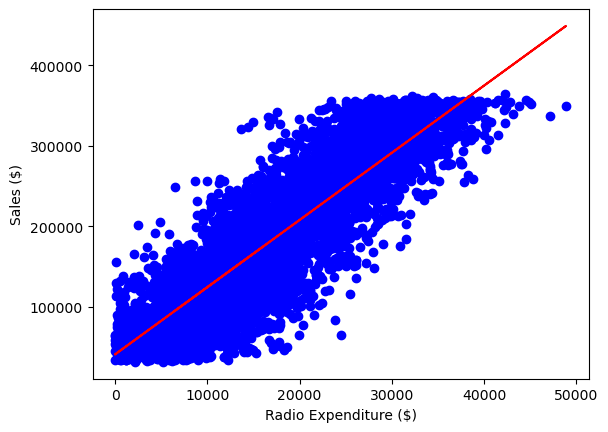

In [15]:
# Importar matplotlib.pyplot como plt.
import matplotlib.pyplot as plt

# Cree un diagrama de dispersión visualizando y contra X, con las observaciones en azul.
plt.scatter(X, y, color="blue")

# Dibuja un gráfico de líneas rojas que muestre las predicciones en contra X.
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Mostrar el plot
plt.show()

### Los fundamentos de la regresión lineal

Queremos ajustar una línea a los datos, y en dos dimensiones esto toma la forma: 
$$y=ax+b.$$
El uso de una sola característica se conoce como regresión lineal simple, donde:
- `y` es el objetivo,
- `x` es la característica y
-  `a`,`b` son los parámetros del modelo que queremos aprender.

`a` y `b` también se denominan coeficientes del modelo, o pendiente e intersección, respectivamente. Entonces, ¿cómo elegimos con precisión los valores de `a` y `b`? Podemos definir una función de error para cualquier línea dada y luego elegir la línea que minimice esta función. ***Las funciones de error también se denominan funciones de pérdida o de costo***.

Visualicemos una función de pérdida usando este diagrama de dispersión. Queremos que la línea esté lo más cerca posible de la observaciones como sea posible. Por lo tanto, queremos minimizar la distancia vertical entre el ajuste y los datos. Por lo tanto, para cada observación, calculamos la distancia vertical entre éste y la línea.

Esta distancia se llama **residual**. Podríamos intentar minimizar la suma de los residuos, pero entonces cada residuo positivo se cancelaría con cada residuo negativo. Para evitar esto, elevamos al cuadrado los residuos. Sumando todos los residuos al cuadrado, calculamos la suma residual de cuadrados, o RSS: 
$$RSS = \sum_{i=1}^n (y_i-\hat{y}_i)^2$$
Este tipo de regresión lineal se llama **Mínimos Cuadrados Ordinarios**, u **OLS**, donde nuestro objetivo es minimizar el RSS.

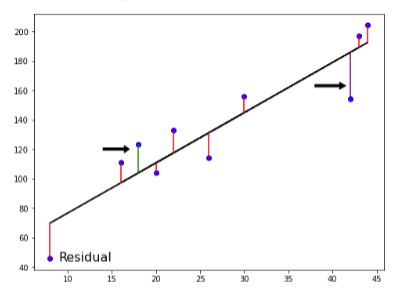

In [17]:
Image(filename="/home/jovyan/notebooks/image/01_reg.png")

Cuando tenemos dos características, $x_1$ y $x_2$, y un objetivo, `y`, una línea toma la forma 
$$y = a_1x_1 + a_2x_2 + b.$$ 
Entonces, para ajustar un modelo de regresión lineal especificamos tres variables, $a_1$, $a_2 y la intersección, $b$. Cuando se agregan más funciones, se conoce como regresión lineal múltiple.
$$y = a_1x_1+a_2x_2 + \cdots + a_nx_n+b.$$
Ajustar un modelo de regresión lineal múltiple significa especificar un coeficiente, $a_n$, para $n$ número de características, y $b$. Para múltiples modelos de regresión lineal, `scikit-learn` espera una variable para cada característica y valores objetivo.

Realicemos una regresión lineal para predecir los niveles de glucosa en sangre utilizando todas las funciones del conjunto de datos de diabetes. Importamos `LinearRegression` desde `sklearn.linear_model`. Luego dividimos los datos en conjuntos de entrenamiento y prueba, creamos una instancia del modelo, lo ajustamos al conjunto de entrenamiento y predecimos en el conjunto de prueba. Tenga en cuenta que la regresión lineal en `scikit-learn` realiza `OLS` bajo el capó.

In [20]:
# Libreria
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# DATA
diabetes_df = pd.read_csv("data/diabetes_clean.csv")

# Dividir en variables explicativas y objetivo
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
# Instanciar el modelo
reg_all = LinearRegression()

# Ajustar el modelo a los datos
reg_all.fit(X_train, y_train)

# Predecir
y_pred = reg_all.predict(X_test)

**La métrica predeterminada para la regresión lineal es $R^2$**, que cuantifica la cantidad de varianza en la variable objetivo que se explica por las características. Los valores pueden variar de cero a uno, donde uno significa que las características explican completamente la variación del objetivo. Aquí hay dos gráficos que visualizan el $R^2$ alto y bajo respectivamente.

Para calcular el $R^2$, utilizamos el método de puntuación de puntos del modelo, que supera las características y los objetivos de prueba. En este caso, las características solo explican alrededor del $35\%$ de la variación del nivel de glucosa en sangre.

In [22]:
# R cuadrado
reg_all.score(X_test, y_test)

0.28280468810375115

**Otra forma de evaluar el rendimiento de un modelo de regresión es tomar la media de la suma de cuadrados residuales, conocida como error cuadrático medio o MSE**. 
$$MSE = \dfrac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$$
El MSE se mide en unidades de nuestra variable objetivo, al cuadrado. Por ejemplo, si un modelo predice un valor en dólares, el `MSE` se expresará en dólares al cuadrado. Para convertirlo a dólares, podemos tomar la ***raíz cuadrada, conocida como error cuadrático medio o RMSE***.

$$RMSE = \sqrt{MSE}$$

Para calcular `RMSE`, importamos `mean_squared_error` de `sklearn.metrics` y luego llamamos a `mean_squared_error`. Pasamos `y_test` e `y_pred`, y establecemos el cuadrado en `False`, lo que devuelve la raíz cuadrada del `MSE`. El modelo tiene un error promedio para los niveles de glucosa en sangre de alrededor de $24$ miligramos por decilitro.

In [23]:
# Libraria
from sklearn.metrics import mean_squared_error

# medimos el error cuadrático medio
mean_squared_error(y_test, y_pred, squared=False)

26.341459582232265

### Ejercicio
#### Ajuste y predicción para regresión
Ahora que ha visto cómo funciona la regresión lineal, su tarea consiste en crear un modelo de regresión lineal múltiple utilizando todas las características del conjunto de datos sales_df que se ha cargado previamente.

Luego utilizará este modelo para predecir las ventas en función de los valores de las funciones de prueba.

In [28]:
# Libreria
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# data
sales_df = pd.read_csv("data/advertising_and_sales_clean.csv")

# Crear una matriz X que contenga los valores de todas las características en sales_df e y que contenga todos los valores de la columna "sales".
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

# Instanciar un modelo de regresión lineal.
reg = LinearRegression()

# Ajuste el modelo a los datos de entrenamiento.
reg.fit(X_train, y_train)

# Crear y_pred, haciendo predicciones para sales usar las funciones de prueba.
y_pred = reg.predict(X_test)

print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


#### Rendimiento de regresión
Ahora que ha ajustado un modelo, `reg` ha utilizado todas las funciones de `sales_df` y ha realizado predicciones de los valores de ventas, puede evaluar el rendimiento utilizando algunas métricas de regresión comunes.

Su tarea es descubrir qué tan bien las características pueden explicar la variación en los valores objetivo, además de evaluar la capacidad del modelo para hacer predicciones sobre datos invisibles.

In [30]:
# Importar mean_squared_error.
from sklearn.metrics import mean_squared_error

# Calcular la puntuación R-cuadrado del modelo pasando los valores de las características de prueba y los valores del objetivo de prueba a un método apropiado.
r_squared = reg.score(X_test, y_test)

# Calcular la raíz del error cuadrático medio del modelo usando y_testy y_pred.
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimir r_squared y rmse.
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 8669686.866907286


### Validación cruzada
Ahora nos familiarizamos con la división de pruebas y entrenamiento y las métricas de rendimiento del modelo informático en nuestro conjunto de pruebas. Pero existe un peligro potencial en este proceso.

Si estamos calculando $R^2$ en nuestro conjunto de prueba, el $R^2$ devuelto depende de la forma en que dividimos los datos. Los puntos de datos en el conjunto de prueba pueden tener algunas peculiaridades que significan que el $R^2$ calculado en ellos no es representativo de la capacidad del modelo para generalizar a datos no vistos. Para combatir esta dependencia de lo que es esencialmente una división aleatoria, utilizamos una técnica llamada validación cruzada.

1. Comenzamos dividiendo el conjunto de datos en cinco grupos o pliegues.
2. Luego dejamos de lado el primer pliegue como conjunto de prueba.
3. Ajuste nuestro modelo en los cuatro pliegues restantes y prediga en nuestro conjunto de prueba, y
4. calcular la métrica de interés, como $R^2$.
5. A continuación, reservamos el segundo pliegue como nuestro conjunto de prueba,
6. ajustarse a los datos restantes, predecir en el conjunto de prueba, y
7. calcular la métrica de interés.
8. Luego, de manera similar con el tercer pliegue,
9. El cuarto pliegue,
10. y el quinto pliegue.

Como resultado, obtenemos cinco valores de $R^2$ a partir de los cuales podemos calcular estadísticas de interés, como la media, la mediana y los intervalos de confianza del $95\%$.

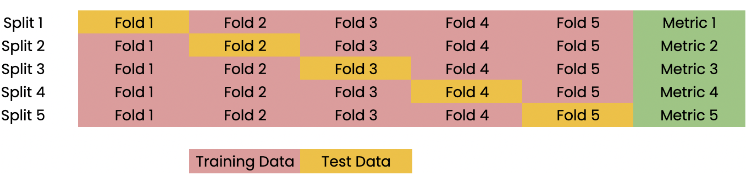

In [2]:
Image(filename="/home/jovyan/notebooks/image/01_validacionCruzada.png")

Como dividimos el conjunto de datos en cinco pliegues, llamamos a este proceso validación cruzada de cinco pliegues. Si usamos diez pliegues, se llama validación cruzada de diez pliegues. De manera más general, si usamos k pliegues, se llama validación cruzada de k pliegues o CV de k pliegues. Sin embargo, existe una contrapartida: **usar más pliegues es más costoso computacionalmente. Esto se debe a que estamos ajustando y prediciendo más veces.**

Para realizar una validación cruzada `k-fold` en `scikit-learn`, importamos `cross_val_score` de `sklearn.model_selection`. También importamos `KFold`, que nos permite establecer una semilla y mezclar nuestros datos, haciendo que nuestros resultados sean repetibles en sentido descendente. Primero llamamos a `KFold`. El argumento `n_splits` tiene un valor predeterminado de cinco, pero en este caso asignamos seis, lo que nos permite usar seis pliegues de nuestro conjunto de datos para la validación cruzada. También configuramos `shuffle` en `True`, que mezcla nuestro conjunto de datos antes de dividirlo en pliegues. También asignamos una semilla al argumento de la palabra clave `random_state`, asegurando que nuestros datos se dividan de la misma manera si repetimos el proceso, haciendo que los resultados sean repetibles en sentido descendente. Guardamos esto como la variable `kf`. Como es habitual, instanciamos nuestro modelo, en este caso, regresión lineal. Luego llamamos a `cross_val_score` y pasamos el modelo, los datos de la característica y los datos del objetivo como los primeros tres argumentos posicionales. También especificamos el número de pliegues estableciendo el argumento de palabra clave `cv` igual a nuestra variable `kf`. Esto devuelve una serie de puntuaciones de validación cruzada, que asignamos a `cv_results`. La longitud de la matriz es el número de pliegues utilizados. Tenga en cuenta que la puntuación informada es $R^2$, ya que es la puntuación predeterminada para la regresión lineal.

Ahora podemos imprimir las partituras. Esto arroja seis resultados que van desde $0.7$ hasta aproximadamente $0.77$. Podemos calcular la puntuación media usando $np.mean$ y la desviación estándar usando $np.std$. Además, podemos calcular el intervalo de confianza del 95% usando la función $np.cuantil$, pasando nuestros resultados seguidos de una lista que contiene los límites superior e inferior de nuestro intervalo como decimales.

In [10]:
# Librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# DATA
diabetes_df = pd.read_csv("data/diabetes_clean.csv")

# Dividir en variables explicativas y objetivo
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Establecer una semilla y mezclar datos 
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Intanciar el modelo
reg = LinearRegression()

# validación cruzada
cv_results = cross_val_score(reg, X, y, cv=kf)

# Imprimir 
print(cv_results)

# imprimir(la media y desviación estandar de cv_results
print(np.mean(cv_results), np.std(cv_results))

# Imprimir quantile
print(np.quantile(cv_results, [0.025,0.975]))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
0.31909697867344794 0.070153206101142
[0.24088592 0.41580685]


### Ejemplo

#### Validación cruzada para R cuadrado
La validación cruzada es un enfoque vital para evaluar un modelo. Maximiza la cantidad de datos disponibles para el modelo, ya que el modelo no solo se entrena sino que también se prueba con todos los datos disponibles.

En este ejercicio, creará un modelo de regresión lineal y luego utilizará una validación cruzada de 6 pliegues para evaluar su precisión para predecir las ventas utilizando el gasto en publicidad en redes sociales. Mostrará la puntuación individual para cada uno de los seis pliegues.

In [8]:
# Librerias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# data
sales_df = pd.read_csv("data/advertising_and_sales_clean.csv")

# Crear una matriz X que contenga los valores de todas las características en sales_df e y que contenga todos los valores de la columna "sales".
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

# Intanciar el modelo
reg = LinearRegression()

# Crear un objeto KFold(), estableciendo el número de divisiones en seis, shufflea True y fijar una semilla de 5.
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Realice una validación cruzada utilizando reg en X e y, pasando kf a cv.
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Imprime el cv_scores.
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


#### Análisis de métricas de validación cruzada

Ahora que ha realizado la validación cruzada, es momento de analizar los resultados.
Mostrará la media, la desviación estándar y el intervalo de confianza del $95\%$ para `cv_scores`.

In [12]:
# Calcular e imprimir la media de los resultados.
print(np.mean(cv_scores))

# Calcular e imprimir la desviación estándar de cv_results.
print(np.std(cv_scores))

# Mostrar el intervalo de confianza del 95% para tus resultados utilizando np.quantile().
print(np.quantile(cv_scores,[0.025,0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


### Regresión regularizada

***Ahora exploremos la regularización en regresión, una técnica utilizada para evitar el sobreajuste.***

Recordemos que el ajuste de un modelo de regresión lineal minimiza una función de pérdida para elegir un coeficiente, `a`, para cada característica, y la intersección, `b`. Si permitimos que estos coeficientes sean muy grandes, podemos producir un sobreajuste. Por lo tanto, **es una práctica común alterar la función de pérdida para que penalice los coeficientes grandes. Esto se llama regularización.**

#### Regresión Ridge
El primer tipo de regresión regularizada que veremos se llama Ridge. Con Ridge, utilizamos la función de pérdida de mínimos cuadrados ordinarios más el valor al cuadrado de cada coeficiente, multiplicado por una constante $\alpha$. 
$$\alpha\sum_{i=1}^n a_i^2.$$
Entonces, al minimizar la función de pérdida, los modelos son penalizados por coeficientes con valores positivos o negativos grandes. Cuando usamos Ridge, debemos elegir el valor $\alpha$ para poder ajustar y predecir. Básicamente, podemos seleccionar el $\alpha$ para el que nuestro modelo funciona mejor. Elegir $\alpha$ para Ridge es similar a elegir $k$ en KNN. ***$\alpha$ en Ridge se conoce como hiperparámetro, que es una variable utilizada para seleccionar los parámetros de un modelo***. $\alpha$ controla la complejidad del modelo. Cuando $\alpha$ es igual a cero, estamos realizando OLS, donde los coeficientes grandes no se penalizan y puede ocurrir un sobreajuste. ***Un $\alpha$ alto significa que los coeficientes grandes se ven penalizados significativamente, lo que puede provocar un desajuste***.

Para realizar la regresión de crestas en `scikit-learn`, importamos Ridge de `sklearn.linear_model`. Para resaltar el impacto de los diferentes valores $\alpha$, creamos una lista vacía para nuestras puntuaciones y luego recorremos una lista de diferentes valores $\alpha$. Dentro del bucle for creamos una instancia de Ridge, estableciendo el argumento de la palabra clave $\alpha$ igual al iterador, también llamado `alpha`. Nos ajustamos a los datos de entrenamiento y predecimos a partir de los datos de prueba. Guardamos el valor $R^2$ del modelo en la lista de puntuaciones. Finalmente, fuera del ciclo, imprimimos las puntuaciones de los modelos con cinco valores $\alpha$ diferentes. Vemos que el rendimiento empeora a medida que aumenta $\alpha$.

In [ ]:
# Librerias

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# DATA
diabetes_df = pd.read_csv("data/diabetes_clean.csv")

# Dividir en variables explicativas y objetivo
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
score[]
for alpha in 

#### Regresión de Lasso
02:27 - 02:42
Existe otro tipo de regresión regularizada llamada lasso, donde nuestra función de pérdida es la función de pérdida MCO más el valor absoluto de cada coeficiente multiplicado por una constante, alfa.

6. Regresión Lasso en Scikit-Learn
02:42 - 02:57
Para usar Lasso lo importamos desde sklearn-dot-linear_model. El método real para realizar la regresión de lazo en scikit-learn refleja la regresión de cresta, como podemos ver aquí. ¡El rendimiento cae sustancialmente a medida que el alfa supera los 20!

7. Regresión Lasso para selección de características
02:57 - 03:17
En realidad, la regresión de lazo se puede utilizar para evaluar la importancia de las características. Esto se debe a que tiende a reducir a cero los coeficientes de las características menos importantes. Las características cuyos coeficientes no se reducen a cero se seleccionan mediante el algoritmo de lazo. Veamos esto en la práctica.

8. Lasso para selección de características en scikit-learn
03:17 - 03:56
Importamos Lasso. A continuación, creamos nuestras matrices de características y objetivos, y usamos el atributo de columnas de puntos del conjunto de datos para acceder a los nombres de las características y almacenarlos como nombres de variables. Mientras calculamos la importancia de las características, utilizamos todo el conjunto de datos, en lugar de dividirlo. Luego creamos una instancia de Lasso, estableciendo alfa en cero punto uno. Ajustamos el modelo a los datos y extraemos los coeficientes utilizando el atributo dot-coef-underscore, almacenándolo como lasso_coef. Luego trazamos los coeficientes para cada característica.

9. Lazo para selección de funciones en scikit-learn
03:56 - 04:24
Podemos ver que el predictor más importante para nuestra variable objetivo, los niveles de glucosa en sangre, es el valor binario de si un individuo tiene diabetes o no. Esto no es sorprendente, pero es un gran control de cordura. Este tipo de selección de funciones es muy importante porque nos permite comunicar los resultados a audiencias no técnicas. También es útil para identificar qué factores son predictores importantes de diversos fenómenos físicos.